In [1]:
import nltk
import tika
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
nltk.download('stopwords')
from nltk import pos_tag, word_tokenize, RegexpParser
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from rake_nltk import Rake
import yake
import spacy
import matplotlib.pyplot as plt
from spacy import displacy
from collections import Counter
import en_core_web_sm
from bs4 import BeautifulSoup
from tika import parser
import requests
import re
import numpy as np
import tweepy as tw
import seaborn as sns 
import json
import pandas as pd
from textblob import TextBlob

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\beast\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\beast\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\beast\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
#Getting authorization
consumer_key = 'Add_your_consumer_key_here'
consumer_key_secret = 'Add_your_consumer_key_secret_here'
access_token = 'Add_your_access_token_here'
access_token_secret = 'Add_your_access_token_secret_here'
auth = tw.OAuthHandler(consumer_key, consumer_key_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)

In [41]:
# Create a custom search term and define the number of tweets
search_term = "#DonaldTrump -filter:retweets"

tweets = tw.Cursor(api.search_tweets,
                   q=search_term,
                   lang="en",
                   since_id='2023-04-04').items(1000)

In [42]:
searched_tweets = [t for t in tweets]

In [43]:
#Part-3: Creating Dataframe of Tweets

#Cleaning searched tweets and converting into Dataframe
my_list_of_dicts = []
for each_json_tweet in searched_tweets:
    my_list_of_dicts.append(each_json_tweet._json)
    
with open('tweet_json_FM_Data.txt', 'w') as file:
        file.write(json.dumps(my_list_of_dicts, indent=4))
        
my_demo_list = []
with open('tweet_json_FM_Data.txt', encoding='utf-8') as json_file:  
    all_data = json.load(json_file)
    for each_dictionary in all_data:
        tweet_id = each_dictionary['id']
        text = each_dictionary['text']
        favorite_count = each_dictionary['favorite_count']
        retweet_count = each_dictionary['retweet_count']
        created_at = each_dictionary['created_at']
        my_demo_list.append({'tweet_id': str(tweet_id),
                             'text': str(text),
                             'favorite_count': int(favorite_count),
                             'retweet_count': int(retweet_count),
                             'created_at': created_at,
                            })
        
        tweet_dataset = pd.DataFrame(my_demo_list, columns = 
                                  ['tweet_id', 'text', 
                                   'favorite_count', 'retweet_count', 
                                   'created_at'])
    
#Writing tweet dataset ti csv file for future reference
tweet_dataset.to_csv('tweet_data_FM.csv',index=False)

For cleaning tweets

In [44]:
def remove_url(txt):
    #Replace URLs found in a text string with nothing
    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())

In [45]:
#Removing @ handle
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt 

In [46]:
tweet_dataset['text'] = np.vectorize(remove_url)(tweet_dataset['text'])

In [47]:
tweet_dataset['text'] = np.vectorize(remove_pattern)(tweet_dataset['text'], "@[\w]*")

In [48]:
#Writing tweet dataset to csv file for future reference
tweet_dataset.to_csv('tweet_data_clean_FM.csv',index=False)

In [49]:
tweet_dataset = pd.read_csv('tweet_data_clean_FM.csv')

Determining Sentiment of the tweet

In [50]:
def tweet_sentiment(txt):
    analysis = TextBlob(txt)
    if analysis.sentiment[0]>=0:
       res = 'positive'
    else:
       res= 'negative'
    return(res)

Positive Sentiment Tweets

In [51]:
tweet_dataset['sentiment'] = np.vectorize(tweet_sentiment)(tweet_dataset['text'].astype(str))
tweet_dataset[tweet_dataset['sentiment'] == 'positive']['text']

1      The 16 billion FoxDominion trial has begunDomi...
2                   Save AfricanDonaldJChump DonaldTrump
3                             DonaldTrump best president
4      AMEN Unless God blesses us with someone else h...
5      DonaldTrump had so far not gotten back on Twit...
                             ...                        
984    Opinion Jim Jordan holds a hearing to help Tru...
987    Former US President Donald Trump earned betwee...
989    ProRon DeSantis Group Launches Puzzling New At...
991    Aizen PowerOne Simple Way To Maintain Normal E...
997    PapiTrumpo AwesomeIts nice to see the People C...
Name: text, Length: 484, dtype: object

Negative Sentiment Tweet

In [52]:
tweet_dataset['sentiment'] = np.vectorize(tweet_sentiment)(tweet_dataset['text'].astype(str))
tweet_dataset[tweet_dataset['sentiment'] == 'negative']['text']

0      Random Trump randomtrump trump donaldtrump gip...
6      Random Trump randomtrump trump donaldtrump gip...
10     Random Trump randomtrump trump donaldtrump gip...
12     Random Trump randomtrump trump donaldtrump gip...
13     Round 2 DonaldTrump TrumpTradingCards collectt...
                             ...                        
994    Random Trump randomtrump trump donaldtrump gip...
995    Random Trump randomtrump trump donaldtrump gip...
996    Random Trump randomtrump trump donaldtrump gip...
998    Random Trump randomtrump trump donaldtrump gip...
999    Random Trump randomtrump trump donaldtrump gip...
Name: text, Length: 516, dtype: object

In [53]:
tweet_dataset.head(20)

,tweet_id,text,favorite_count,retweet_count,created_at,sentiment
0,1648399845902761986,Random Trump randomtrump trump donaldtrump gip...,0,0,Tue Apr 18 18:55:23 +0000 2023,negative
1,1648399655229865984,The 16 billion FoxDominion trial has begunDomi...,0,0,Tue Apr 18 18:54:38 +0000 2023,positive
2,1648399463260602374,Save AfricanDonaldJChump DonaldTrump,0,0,Tue Apr 18 18:53:52 +0000 2023,positive
3,1648399437272870912,DonaldTrump best president,1,0,Tue Apr 18 18:53:46 +0000 2023,positive
4,1648398867078021120,AMEN Unless God blesses us with someone else h...,0,0,Tue Apr 18 18:51:30 +0000 2023,positive
5,1648398607035559937,DonaldTrump had so far not gotten back on Twit...,0,0,Tue Apr 18 18:50:28 +0000 2023,positive
6,1648398586013425678,Random Trump randomtrump trump donaldtrump gip...,0,0,Tue Apr 18 18:50:23 +0000 2023,negative
7,1648398364789055508,Donald Trump returns to Instagram with bizarre...,0,0,Tue Apr 18 18:49:30 +0000 2023,positive
8,1648398206458540036,RepMTG you realize during the timeline you ran...,0,0,Tue Apr 18 18:48:52 +0000 2023,positive
9,1648397581184016390,Free desktop background Superman DonaldTrump d...,0,0,Tue Apr 18 18:46:23 +0000 2023,positive


In [54]:
max_retweets = tweet_dataset['retweet_count']
max_value = max_retweets.max()
print("Maximum number of retweets:", max_value)
max_tweet_senti = tweet_dataset[tweet_dataset['retweet_count'] == max_value]['sentiment']
max_tweet_text = tweet_dataset[tweet_dataset['retweet_count'] == max_value]['text']


print("Sentiment of the tweet with maximum retweets:", max_tweet_senti)
print("The text of the tweet with the maximum retweets:", max_tweet_text)


Maximum number of retweets: 24
Sentiment of the tweet with maximum retweets: 792    positive
Name: sentiment, dtype: object
The text of the tweet with the maximum retweets: 792    Trump Surges Ahead in New Polls with a 30 poin...
Name: text, dtype: object


Displaying the sentiments below in the plot

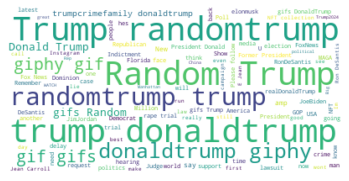

In [55]:
corpus = ' '.join(tweet_dataset.astype(str).text)
# Create stopword list:
stopwords = set(STOPWORDS)
# stopwords.update(["T", "J", "D", "S", "M", "H", "et al"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, max_font_size=50, max_words=100, background_color="white").generate(corpus)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Timeline visualization plot showing counts of positive and negative sentiments with their counts over the period of time.

Bar-Graph Visualization

Total positive sentiments 484
Total negative sentiments 516


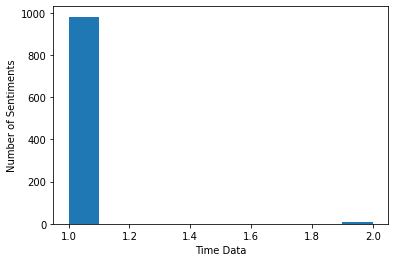

In [56]:
positive_counts = tweet_dataset['sentiment'].value_counts().positive
negative_counts = tweet_dataset['sentiment'].value_counts().negative
print("Total positive sentiments", positive_counts)
print("Total negative sentiments", negative_counts)


fig, ax2 = plt.subplots(1,1)
arr = np.array(list(tweet_dataset['created_at'].value_counts()))
plt.hist(arr)
ax2.set_xlabel('Time Data')
ax2.set_ylabel('Number of Sentiments')
plt.show()